In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer as Imputer
from random import choices
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator

In [ ]:
!gdown 1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9

Downloading...
From: https://drive.google.com/uc?id=1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9
To: /content/kaggle_houseprices_modified.csv
100% 459k/459k [00:00<00:00, 6.73MB/s]


In [ ]:
ds = pd.read_csv('/content/kaggle_houseprices_modified.csv')

In [ ]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,198075.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,199650.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,212325.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,237500.0


In [ ]:
ds.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
ds[ds.columns[80:]].head()

,SalePrice
0,198075.0
1,199650.0
2,212325.0
3,140000.0
4,237500.0


## Preprocessing

In [ ]:
todrop = ['Id']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']
continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']
cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

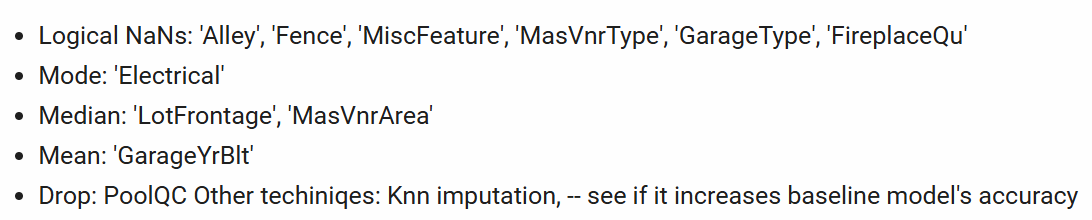

In [ ]:
# run the imputation when not making pipeline

ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
print(ds[continuous].isna().sum().sum())

0


## Preprocessing

In [ ]:
def pre_processing(ds, todrop, categorical, cat_to_con):
  #dropping
  ds = ds.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')
  ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())


  #cat_to_con
  ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding
  target = 'SalePrice'
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')

  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", ds.isna().sum().sum())

  return ds

In [ ]:
ds = pre_processing(ds, todrop, categorical, cat_to_con)

no. of nans in categorical cols: 0
no. of nans in cat_to_con cols: 0
total nans in the dataframe: 0


In [ ]:
ds

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,252692.601839,204994.032276,65.0,8450,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,184007.670192,2008,175316.452684,177454.242947,198075.0
1,207766.905970,204994.032276,80.0,9600,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,178829.893617,...,0,0,201832.730831,195275.313691,0,181414.566176,2007,175316.452684,177454.242947,199650.0
2,252692.601839,204994.032276,68.0,11250,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,216298.142857,2008,175316.452684,177454.242947,212325.0
3,174123.741667,204994.032276,60.0,9550,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,193082.861217,...,0,0,201832.730831,195275.313691,0,184007.670192,2006,175316.452684,146527.787129,140000.0
4,252692.601839,204994.032276,84.0,14260,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,178829.893617,...,0,0,201832.730831,195275.313691,0,197798.869492,2008,175316.452684,177454.242947,237500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,252692.601839,204994.032276,62.0,7917,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,200841.786885,2007,175316.452684,177454.242947,166250.0
1456,207766.905970,204994.032276,85.0,13175,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,155835.051592,195275.313691,0,184007.670192,2010,175316.452684,177454.242947,231000.0
1457,174123.741667,204994.032276,66.0,9042,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,182889.576271,154880.979592,2500,181414.566176,2010,175316.452684,177454.242947,253175.0
1458,207766.905970,204994.032276,68.0,9717,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,...,0,0,201832.730831,195275.313691,0,181148.804255,2010,175316.452684,177454.242947,156337.5


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


scaler = StandardScaler()

ds_scaled = scaler.fit_transform(ds)

In [ ]:
ds_scaled

array([[ 1.29689538,  0.35236535, -0.22087509, ..., -0.28525568,
        -0.25468501,  0.04130749],
       [ 0.30782615,  0.35236535,  0.46031974, ..., -0.28525568,
        -0.25468501,  0.056472  ],
       [ 1.29689538,  0.35236535, -0.08463612, ..., -0.28525568,
        -0.25468501,  0.1785102 ],
       ...,
       [-0.43285061,  0.35236535, -0.1754621 , ..., -0.28525568,
        -0.25468501,  0.57182464],
       [ 0.30782615,  0.35236535, -0.08463612, ..., -0.28525568,
        -0.25468501, -0.36055204],
       [ 0.30782615,  0.35236535,  0.23325479, ..., -0.28525568,
        -0.25468501, -0.30362495]])

In [ ]:
X = ds_scaled[:, :-1]

y = ds['SalePrice'].values

In [ ]:
kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)

    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

31277.140430213938
0.10184115406028563


In [ ]:
len(y_true)

1460

In [ ]:
len(y_pred)

1460

In [ ]:
range(len(y_true))

range(0, 1460)

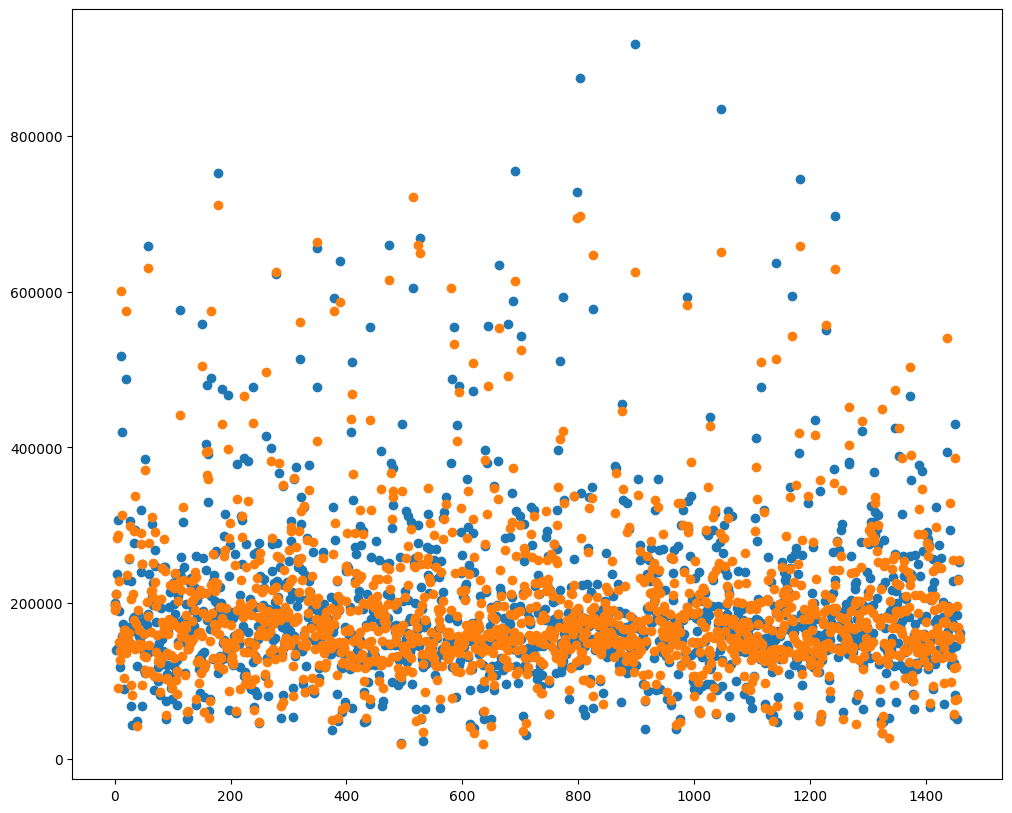

In [ ]:
plt.scatter(range(len(y_true)), y_true)
plt.scatter(range(len(y_true)), y_pred)

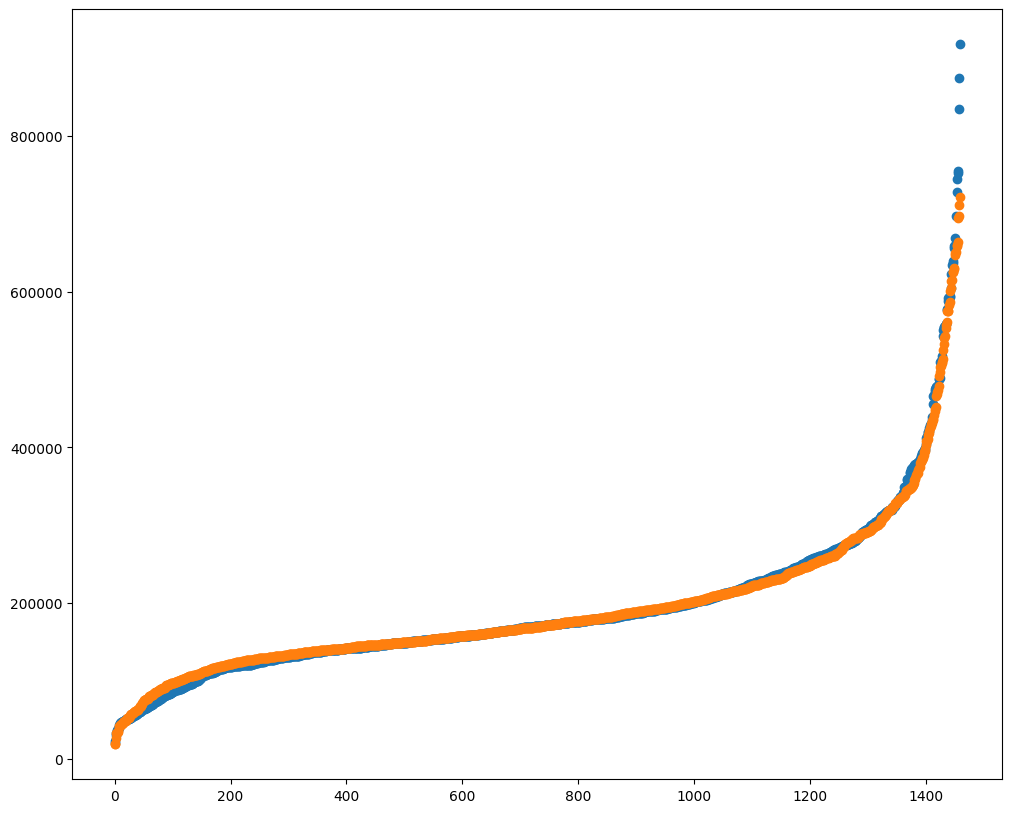

In [ ]:
plt.scatter(range(len(y_true)), sorted(y_true))
plt.scatter(range(len(y_true)), sorted(y_pred))

In [ ]:
from sklearn.decomposition import PCA

cs = [5, 10, 15, 20, 25, 30, 40, 60, 75]

info = []

for i in cs:
  pca = PCA(n_components = i)
  pca.fit(ds_scaled[:, :-1])

  info.append(pca.explained_variance_ratio_.sum())

In [ ]:
info

[0.35819701075632565,
 0.4759750529468739,
 0.5644949413138924,
 0.6388056295631945,
 0.7044158157422951,
 0.7635118096335104,
 0.8588193310788007,
 0.9701672289544914,
 0.9996492681089242]

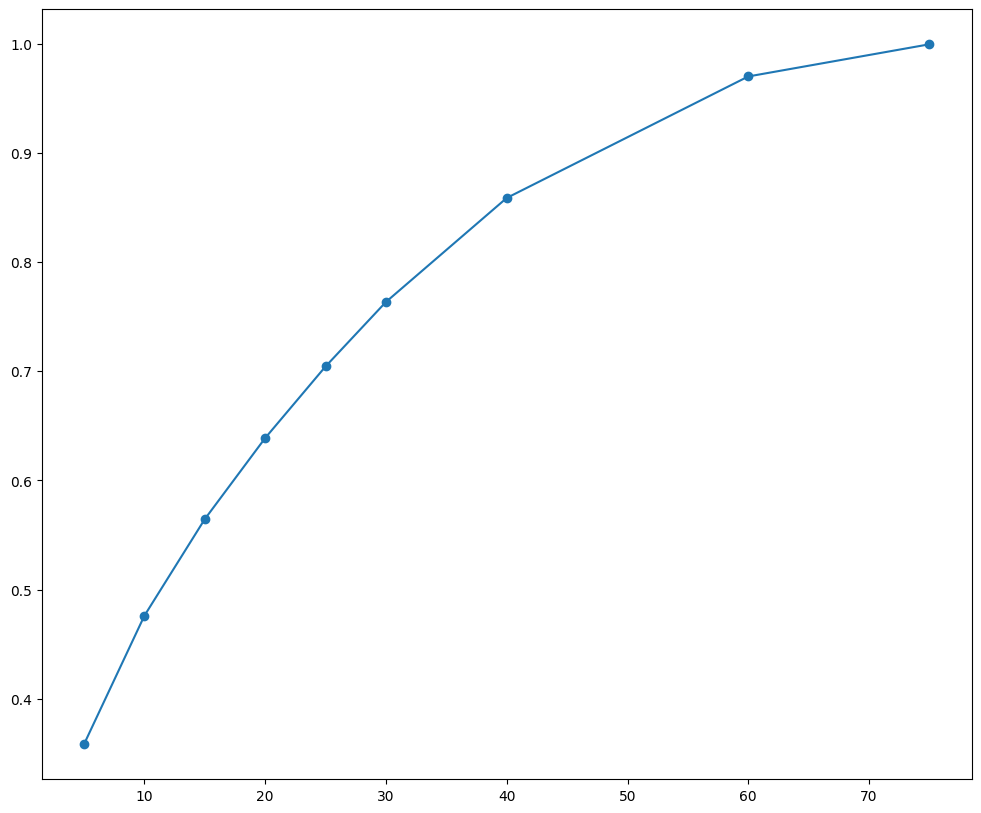

In [ ]:
plt.plot(cs, info, '-o')

In [ ]:
pca = PCA(n_components = 50)

Xpca = pca.fit_transform(ds_scaled[:, :-1])

In [ ]:
Xpca.shape

(1460, 50)

In [ ]:
y = ds['SalePrice']

In [ ]:

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

In [ ]:
print(mse(y_true, y_pred)**0.5)

35771.095737863216


Outlier Detection

In [ ]:
pca = PCA(n_components=2)

vis = pca.fit_transform(ds_scaled[:, :-1])

In [ ]:
vis.shape

(1460, 2)

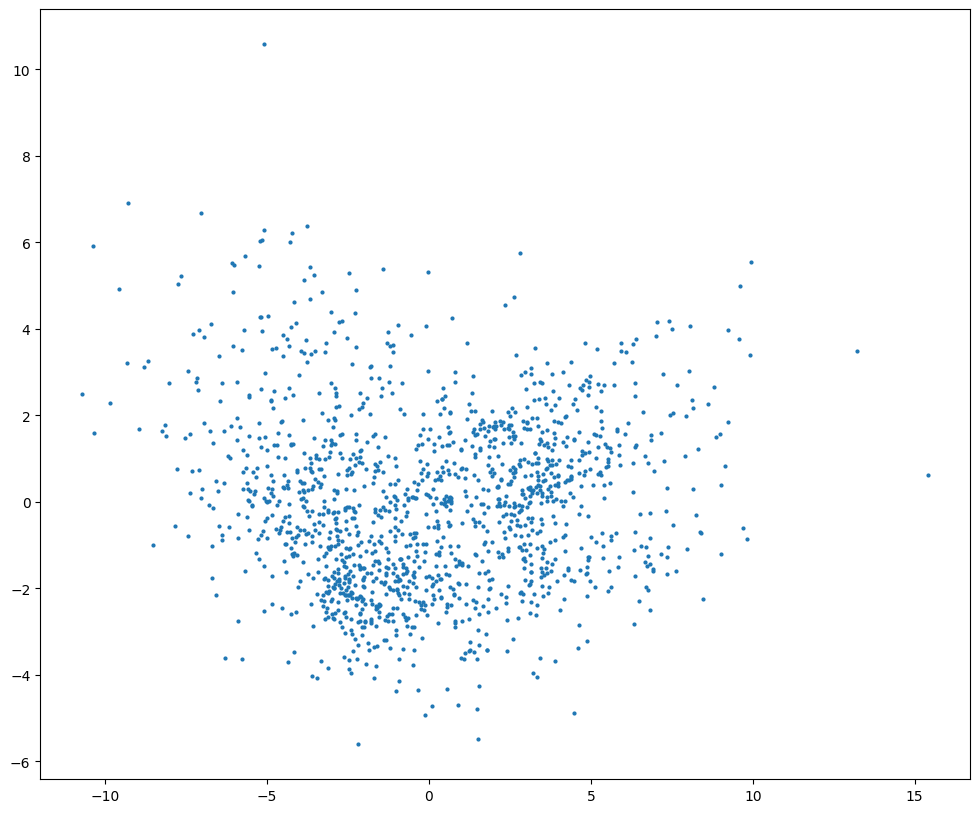

In [ ]:
plt.scatter(vis[:, 0], vis[:,1], s = 4)

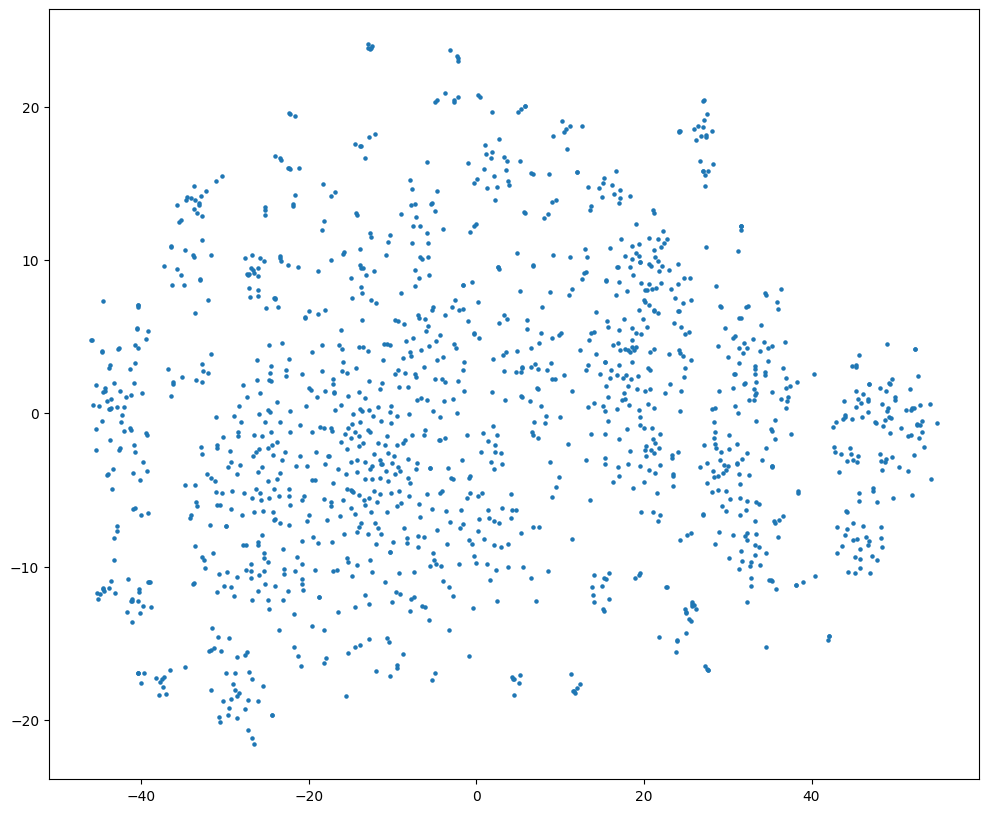

In [ ]:
from sklearn.manifold import TSNE

pca = TSNE(n_components=2, perplexity=50, random_state=0)

vis = pca.fit_transform(ds_scaled[:, :-1])

plt.scatter(vis[:,0], vis[:,1], s=5)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import IsolationForest

In [ ]:
is_outlier  = IsolationForest(contamination= 0.12 , n_estimators= 1000).fit_predict(vis)

In [ ]:
is_outlier

array([1, 1, 1, ..., 1, 1, 1])

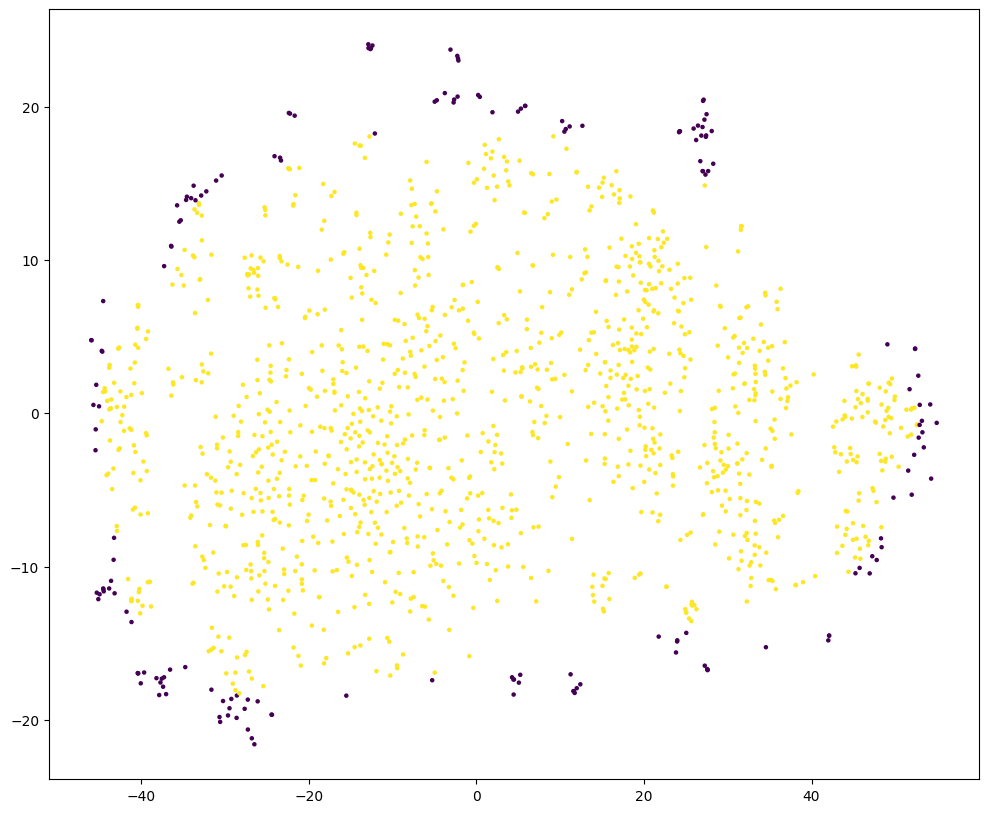

In [ ]:
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

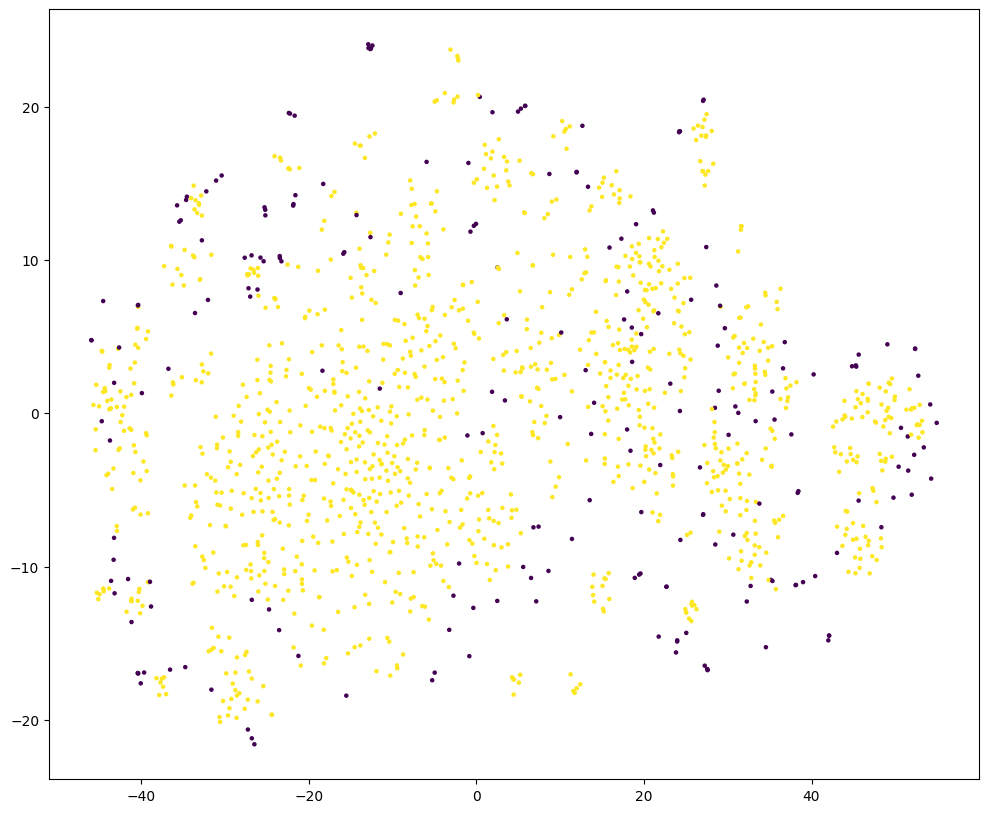

In [ ]:
is_outlier = LocalOutlierFactor(contamination=0.15, n_neighbors=5).fit_predict(vis)

plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

## K Means

In [ ]:
from sklearn.cluster import KMeans


elbow = []

for k in range(2,10):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(ds_scaled[:, :-1])

  elbow.append(kmeans.inertia_)

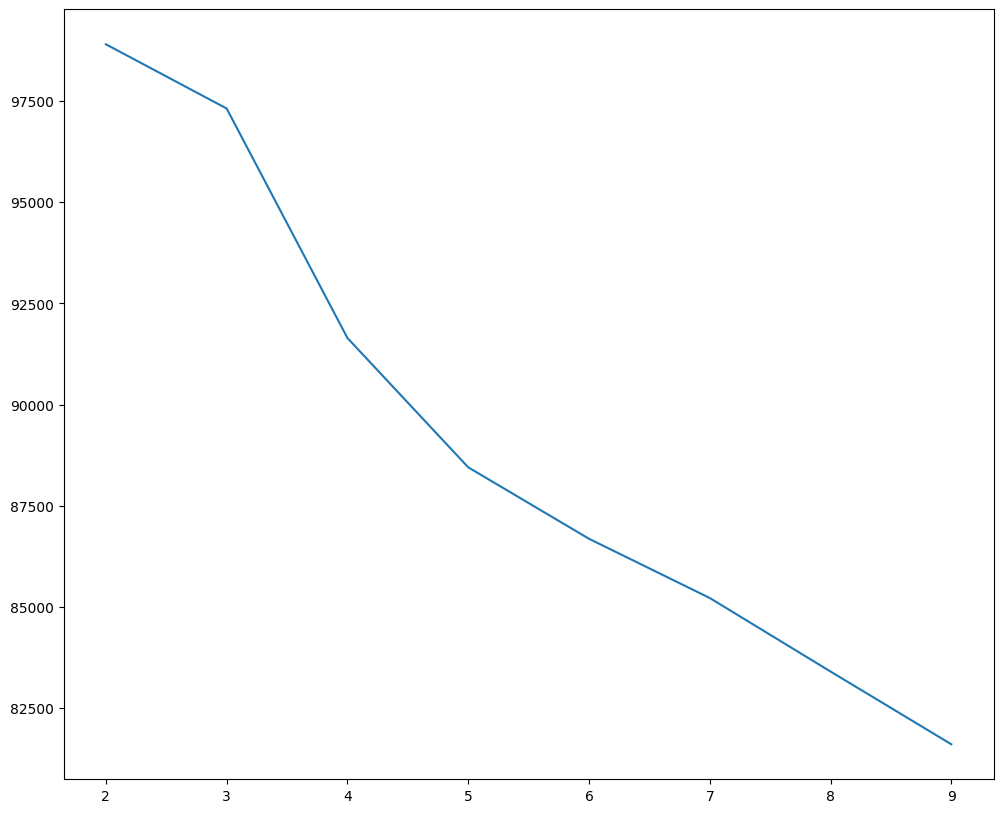

In [ ]:
plt.plot(range(2,10), elbow)

In [ ]:
from sklearn.metrics import silhouette_score

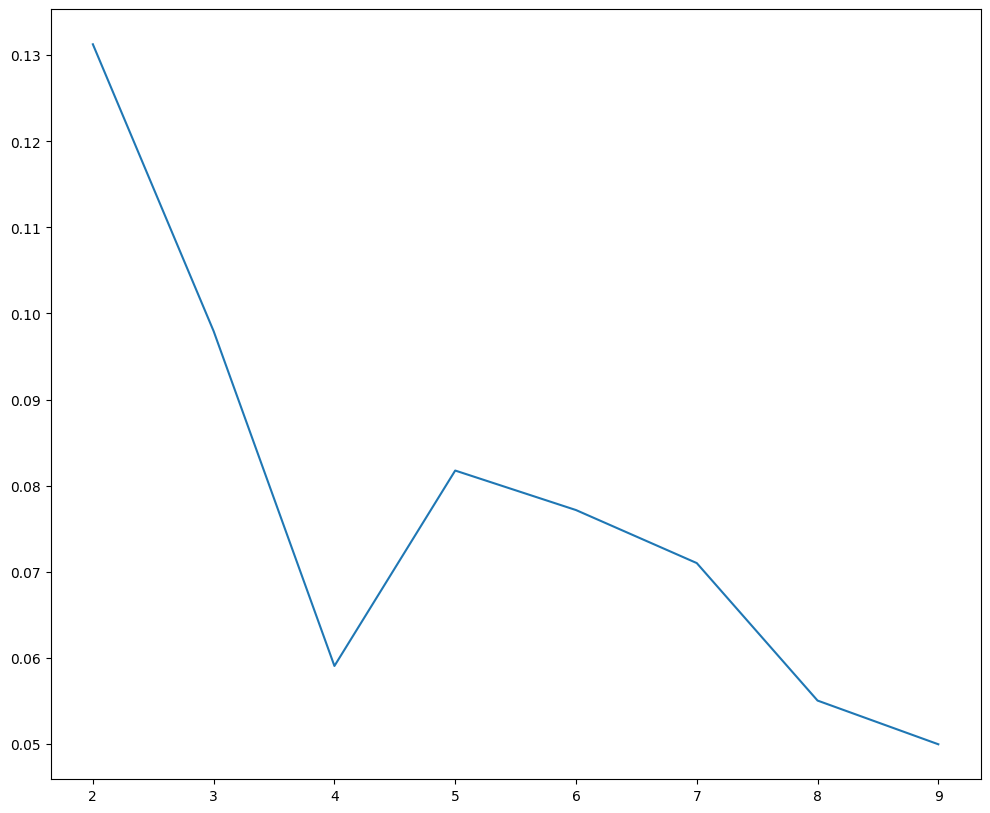

In [ ]:
from sklearn.cluster import KMeans


elbow = []

for k in range(2,10):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(ds_scaled[:, :-1])

  elbow.append(silhouette_score(ds_scaled[:, :-1], kmeans.labels_))

plt.plot(range(2,10), elbow)

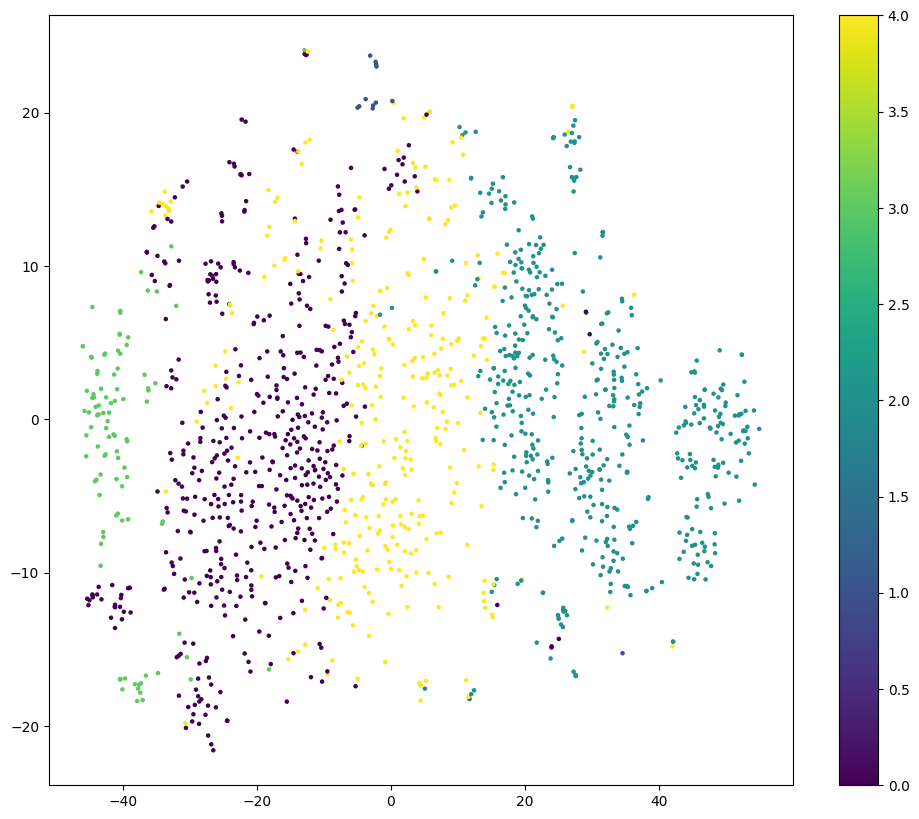

In [ ]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(ds_scaled[:, :-1])

plt.scatter(vis[:, 0], vis[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

## Hierarchical Clustering

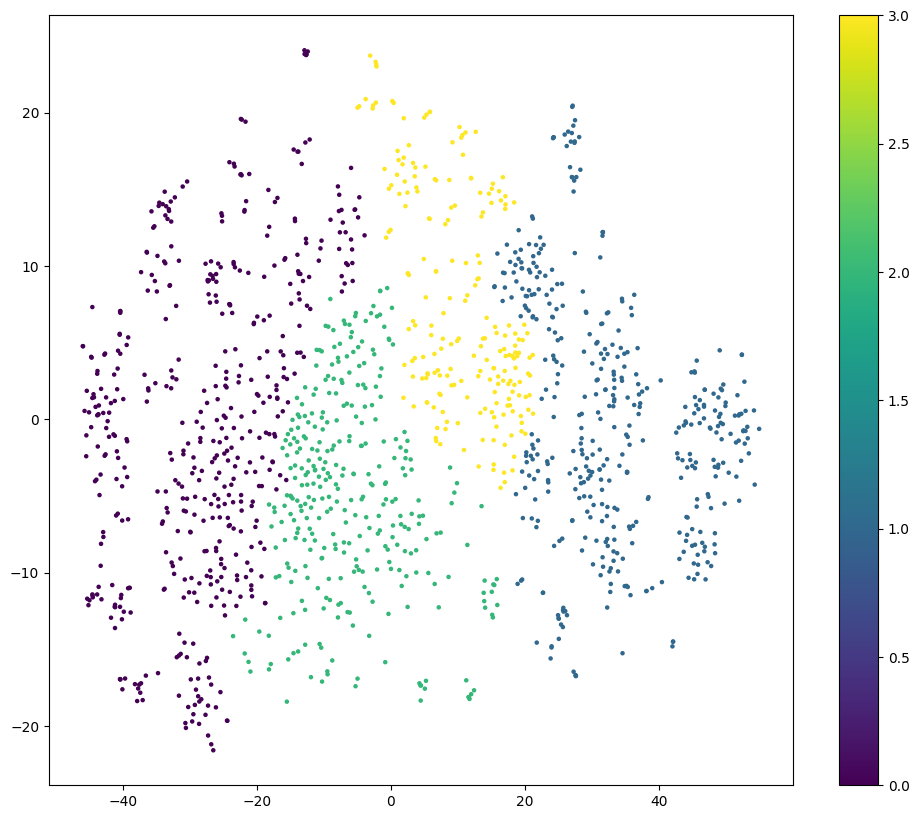

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierar = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward').fit(vis)

plt.scatter(vis[:, 0], vis[:, 1], s=5, c=hierar.labels_)
plt.colorbar()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

dbsc = DBSCAN(eps = 4.5, min_samples= 45).fit(vis)

In [ ]:
dbsc.labels_

array([ 0, -1,  0, ...,  0,  2,  2])

In [ ]:
np.unique(dbsc.labels_)

array([-1,  0,  1,  2,  3,  4])

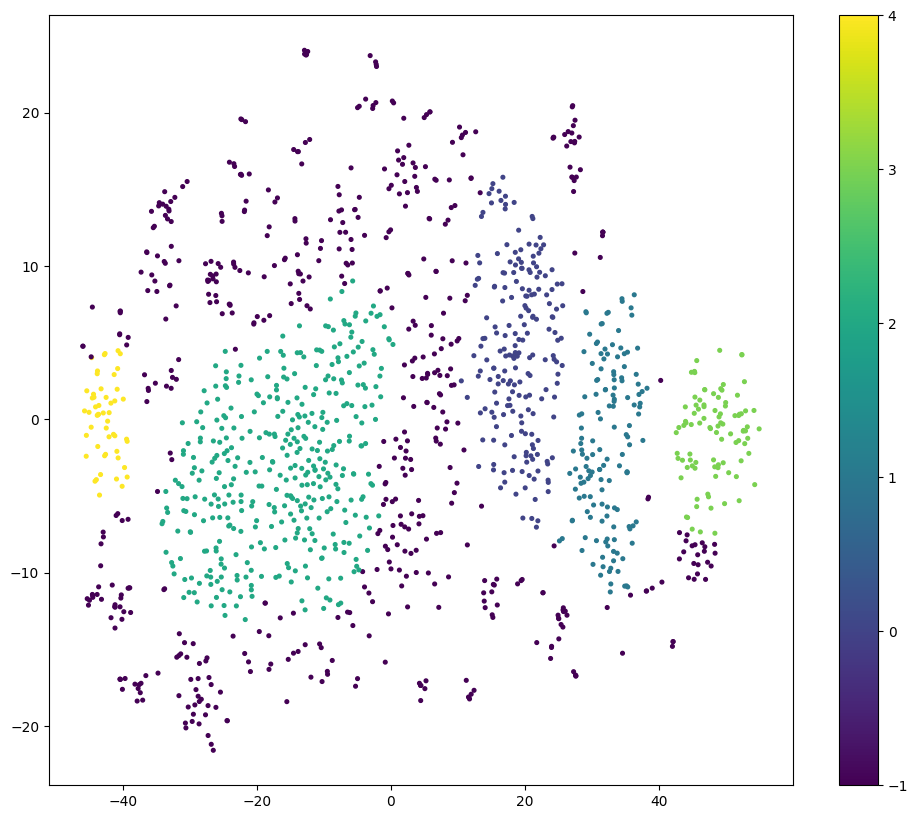

In [ ]:
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

## EDA on clusters


In [ ]:
print("Global Mean: ", ds.SalePrice.mean())

Global Mean:  193784.76647260276


In [ ]:
ds.groupby(dbsc.labels_)['SalePrice'].mean()

,SalePrice
-1,184270.901217
0,226433.120352
1,238941.562500
2,150031.788693
3,372357.129032
4,61967.647059


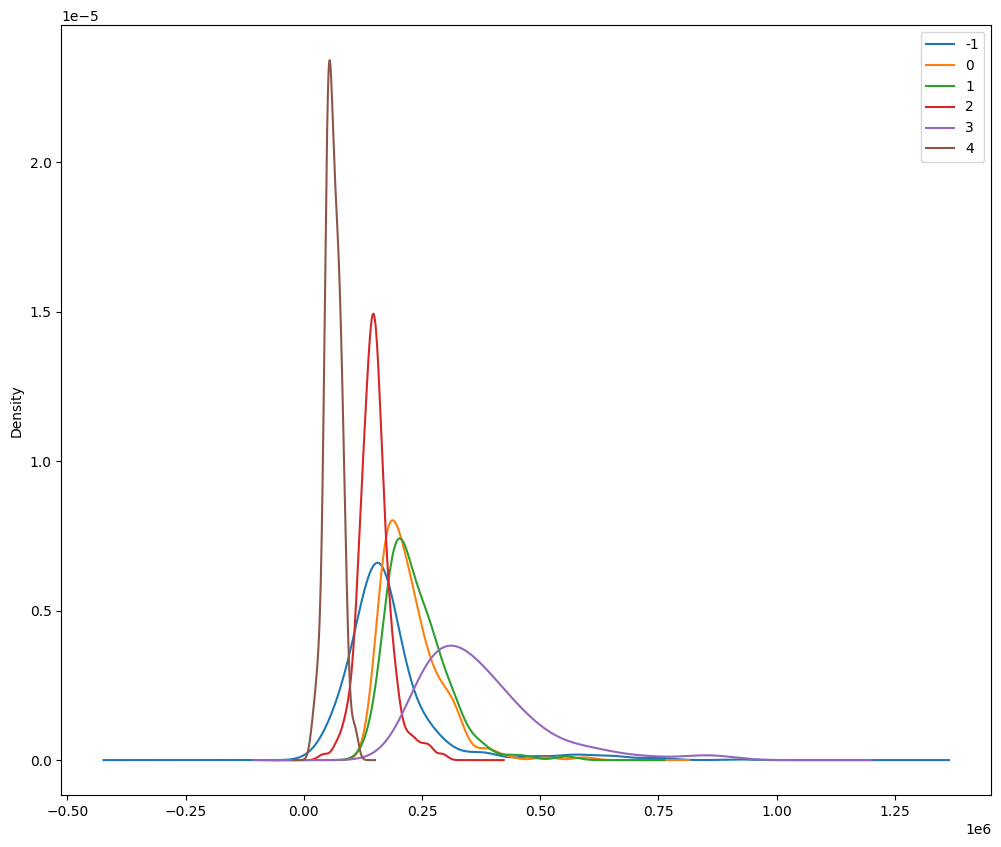

In [ ]:
ds.groupby(dbsc.labels_)['SalePrice'].plot(kind = 'kde')

## plt.legend()

In [ ]:
## Original X and y with outliers

X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

31277.140430213938
0.10184115406028563


In [ ]:
fi = pd.DataFrame()

fi['feature'] = ds.columns[:-1]

fi['importance'] = baseline_estimator.feature_importances_

fi.sort_values(by = 'importance', ascending = False)

,feature,importance
76,SaleType,0.280922
16,OverallQual,0.257103
45,GrLivArea,0.117046
60,GarageCars,0.079479
11,Neighborhood,0.059458
...,...,...
14,BldgType,0.000000
64,PavedDrive,0.000000
47,BsmtHalfBath,0.000000
5,Alley,0.000000


In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c] # This X does not have outliers which dbscan told me
y = ds['SalePrice'].values[c]
c = dbsc.labels_[dbsc.labels_!=-1]


kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5,  mape(y_true, y_pred))

28763.788146654668 0.0893061091193823


## Evaluating Baseline model on outliers

In [ ]:
outliers_X = ds_scaled[dbsc.labels_==-1][:, :-1]

outliers_y = ds[dbsc.labels_==-1]['SalePrice'].values


print(mse(outliers_y, baseline_estimator.predict(outliers_X))**0.5)
print(mape(outliers_y, baseline_estimator.predict(outliers_X)))

46809.29411751332
0.1628961877701243


## Target Transformation

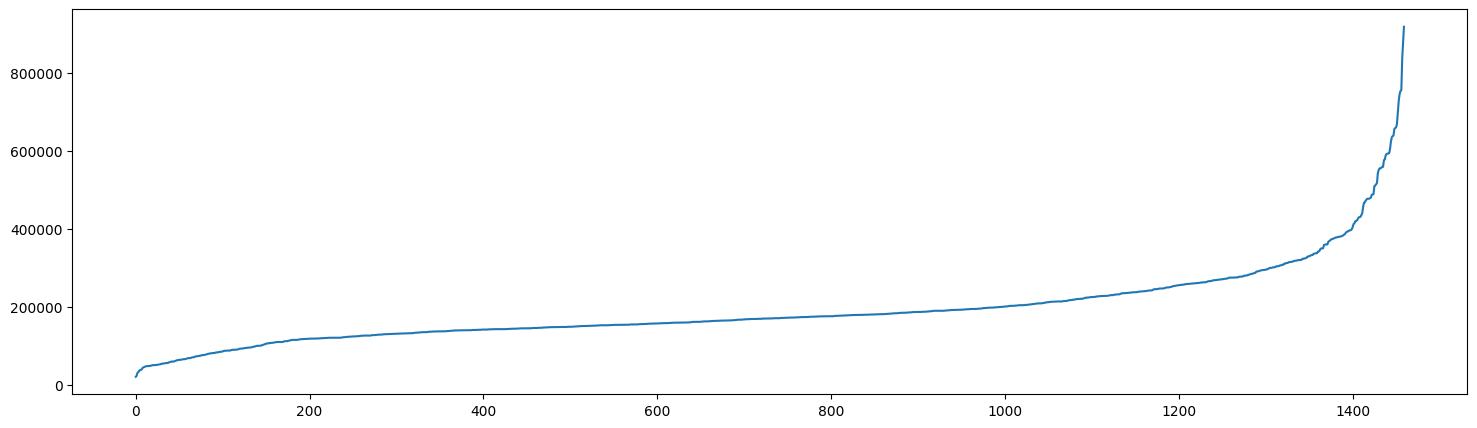

In [ ]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(ds.SalePrice))

In [ ]:
c = dbsc.labels_!=-1

X = ds_scaled[:, :-1][c]


y = np.log(ds['SalePrice'].values)[c]

c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

27135.214641811104 0.08373568049975669


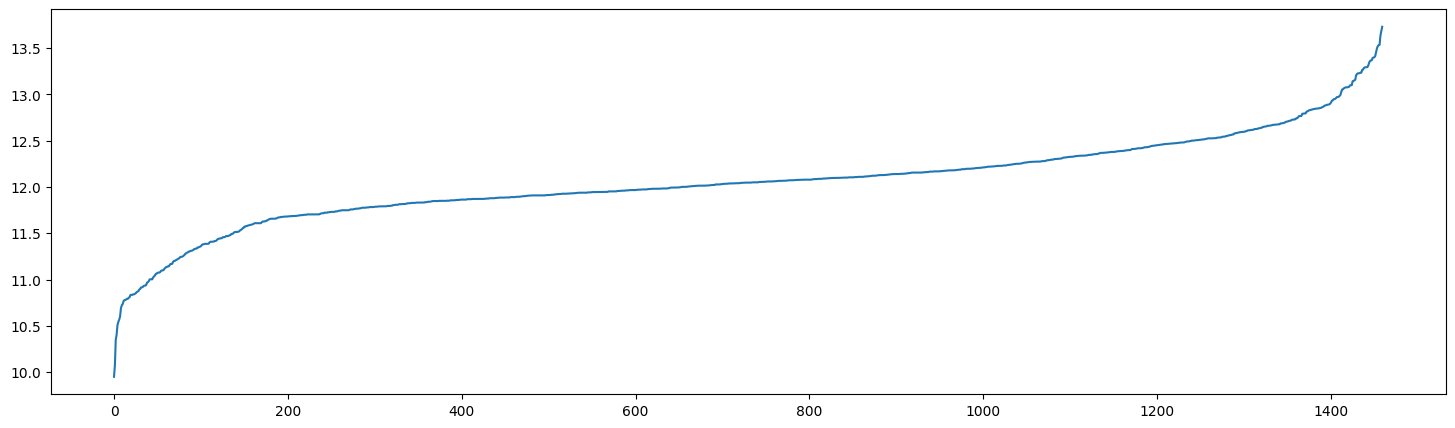

In [ ]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(np.log(ds.SalePrice)))

## CLuster Wise Model

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0
for cluster in range(5):
    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        c_train, c_test = c[train_index], c[test_index]
        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)
        y_true = np.append(y_true, np.exp(y_test[c_test==cluster]))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test[c_test==cluster])))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

0 mse : 22467.674531822915 mape: 0.06589067784448051
1 mse : 24574.950851701356 mape: 0.06338192633284288
2 mse : 16308.418622526266 mape: 0.08394762397351883
3 mse : 61321.06152425323 mape: 0.10326860518877166
4 mse : 13033.677322225501 mape: 0.17356275167230237
64576340.91122606 0.08373568049975669


## Ensemble

In [ ]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50,random_state=42)),
    ('gbdt', GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)),
    ('knn', KNeighborsRegressor(n_neighbors=7))
]

In [ ]:
final_estimator  = LinearRegression()

In [ ]:
#custom stacking
class CustomAlgo(BaseEstimator):

  def __init__(self, estimators, final_estimator):
      self.estimators = estimators
      self.final_estimator = final_estimator


  def fit(self, X, y=None):
        for estimator in self.estimators:
            estimator[1].fit(X, y)

        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        self.final_estimator.fit(pred_features, y)

  def predict(self, X):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.predict(pred_features)

  def score(self, X, y):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.score(pred_features, y)

In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]

    #baseline_estimator = GradientBoostingRegressor(random_state=0)

    baseline_estimator = CustomAlgo(estimators,final_estimator )

    baseline_estimator.fit(X_train, y_train)

    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

In [ ]:
print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

34184.17801349417 0.10186393906008656
